In [1]:
from utils.tools import get_dataset, visualise_data

2025-03-16 11:34:05.989112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742085246.008318  159130 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742085246.014281  159130 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742085246.029066  159130 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742085246.029094  159130 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742085246.029096  159130 computation_placer.cc:177] computation placer alr

In [3]:
from pennylane import numpy as np

## Setup

In [1]:
import tensorflow as tf

import sympy
import numpy as np
import seaborn as sns
import collections

# importing "random" for random operations
import random

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

2025-03-16 11:17:24.633946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742084244.652625  158795 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742084244.658402  158795 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742084244.672856  158795 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742084244.672869  158795 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742084244.672871  158795 computation_placer.cc:177] computation placer alr

## Data preprocessing

### Load raw data

In [2]:
def get_dataset(digits=[3, 5], n_px=8, train_size=800, test_size=200):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Rescale the images from [0,255] to the [0.0,1.0] range.
    x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[...,
                                                               np.newaxis] / 255.0

    # Create a boolean mask to filter out only the samples with desired label
    filter_mask = np.isin(y_train, digits)
    
    # Apply the filter mask to the features and labels to keep only the selected digits
    x_train = x_train[filter_mask]
    y_train = y_train[filter_mask]
    
    # Do the same for test dataset
    filter_mask = np.isin(y_test, digits)
    
    x_test = x_test[filter_mask]
    y_test = y_test[filter_mask]

    # Randomly select samples
    random_indices = np.random.choice(x_train.shape[0], train_size, replace=False)
    
    # Select the corresponding samples
    x_train = x_train[random_indices]
    y_train = y_train[random_indices]  # Select corresponding labels
    
    # Do the same for test samples
    random_indices = np.random.choice(x_test.shape[0], test_size, replace=False)
    
    # Select the corresponding samples
    x_test = x_test[random_indices]
    y_test = y_test[random_indices]  # Select corresponding labels

    with tf.device(':CPU:0'):
        x_train = tf.image.resize(x_train, (n_px, n_px)).numpy()
        x_test = tf.image.resize(x_test, (n_px, n_px)).numpy()

    return (x_train, y_train), (x_test, y_test)

In [3]:
def visualize_data(digits, x, y, pred=None):
    n_img = len(x)
    labels_list = digits
    fig, axes = plt.subplots(1, len(x), figsize=(2*len(x), 2))
    for i in range(n_img):
        axes[i].imshow(x[i], cmap="gray")
        if pred is None:
            axes[i].set_title("Label: {}".format(labels_list[y[i]]))
        else:
            axes[i].set_title("Label: {}, Pred: {}".format(labels_list[y[i]], labels_list[pred[i]]))
    plt.tight_layout(w_pad=2)

In [10]:
digits = [3,5,7,8]
(x_train, y_train), (x_test, y_test) = get_dataset(digits, 16, train_size=10000)
print(f'X_train: {np.shape(x_train)} {type(x_train)} {x_train.dtype}')
print(f'X_test : {np.shape(x_test)} {type(x_test)} {x_test.dtype}')
print(f'y_train: {np.shape(y_train)} {type(y_train)} {y_train.dtype}')
print(f'y_test : {np.shape(y_test)} {type(x_test)} {y_test.dtype}')
print(f'Digits : {np.unique(y_train)}')

X_train: (10000, 16, 16, 1) <class 'numpy.ndarray'> float32
X_test : (200, 16, 16, 1) <class 'numpy.ndarray'> float32
y_train: (10000,) <class 'numpy.ndarray'> uint8
y_test : (200,) <class 'numpy.ndarray'> uint8
Digits : [3 5 7 8]


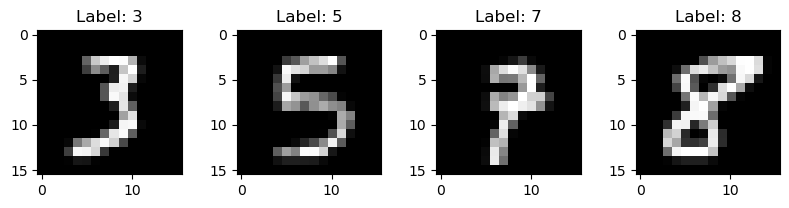

In [11]:
# show one image from each class
x_vis = [(x_train[y_train==digit])[np.random.choice(range(10))] for digit in digits] 
y_vis = range(len(digits))

visualise_data(digits, x_vis, y_vis)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[...,
                                                           np.newaxis] / 255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


Label: 0


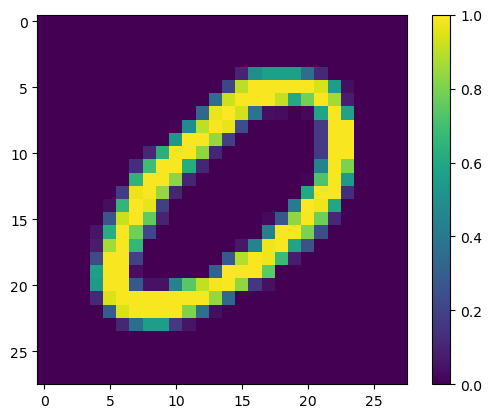

In [3]:
sample = random.choice(range(len(y_train)))
print(f'Label: {y_train[sample]}')

plt.imshow(x_train[sample, :, :, 0])
plt.colorbar()
plt.show()

### Filter labels

In [4]:
digits = [3, 5]

# Create a boolean mask to filter out only the samples with desired label
filter_mask = np.isin(y_train, digits)

# Apply the filter mask to the features and labels to keep only the selected digits
x_train = x_train[filter_mask]
y_train = y_train[filter_mask]

# Do the same for test dataset
filter_mask = np.isin(y_test, digits)

x_test = x_test[filter_mask]
y_test = y_test[filter_mask]

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 11552
Number of filtered test examples: 1902


Label: 5


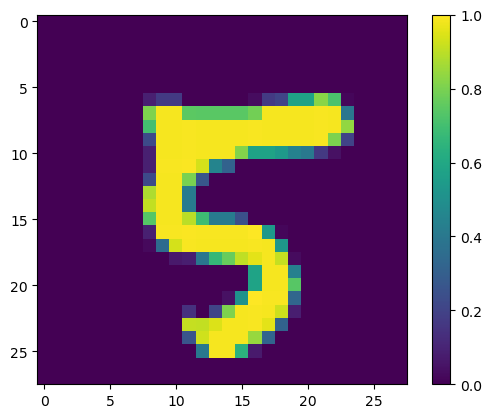

In [5]:
sample = random.choice(range(len(y_train)))
print(f'Label: {y_train[sample]}')

plt.imshow(x_train[sample, :, :, 0])
plt.colorbar()
plt.show()

### Reduce number of samples

In [6]:
num_train_samples = 1000
num_test_samples = 200

# Randomly select samples
random_indices = np.random.choice(x_train.shape[0], num_train_samples, replace=False)

# Select the corresponding samples
x_train = x_train[random_indices]
y_train = y_train[random_indices]  # Select corresponding labels

# Do the same for test samples
random_indices = np.random.choice(x_test.shape[0], num_test_samples, replace=False)

# Select the corresponding samples
x_test = x_test[random_indices]
y_test = y_test[random_indices]  # Select corresponding labels

print("Number of reduced training examples:", len(y_train))
print("Number of reduced test examples:", len(y_test))

Number of reduced training examples: 1000
Number of reduced test examples: 200


Label: 5


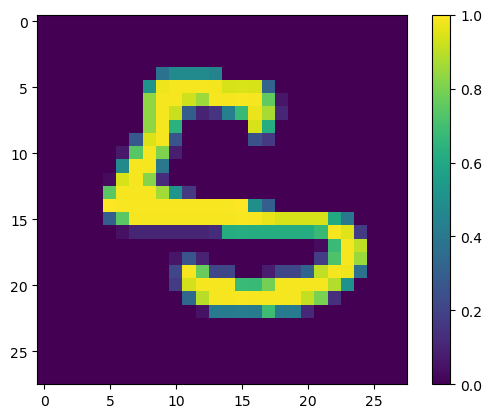

In [7]:
# check that the labelling is not messed up
sample = random.choice(range(num_train_samples)) # use this same sample to test downscaling
print(f'Label: {y_train[sample]}')

plt.imshow(x_train[sample, :, :, 0])
plt.colorbar()
plt.show()

### Downscale the images

In [8]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
n_px = 8
# with tf.device(':CPU:0'):
#     x_train_small = tf.image.resize(x_train, (n_px, n_px)).numpy()
#     x_test_small = tf.image.resize(x_test, (n_px, n_px)).numpy()

x_train_small = tf.image.resize(x_train, (n_px, n_px)).numpy()
x_test_small = tf.image.resize(x_test, (n_px, n_px)).numpy()

I0000 00:00:1741830308.509353  152126 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11433 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:02:00.0, compute capability: 6.0


In [11]:
# Clear session to free up GPU memory after resizing
tf.keras.backend.clear_session()

Label: 3


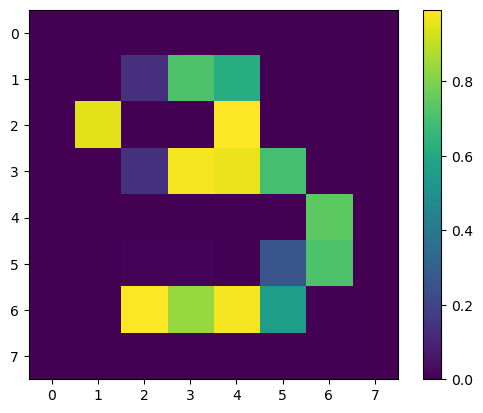

In [14]:
print(f'Label: {y_train[sample]}')

plt.imshow(x_train_small[sample, :, :, 0])
plt.colorbar()
plt.show()

### Adjust labels
might not need this as we can do one-hot encoding

In [10]:
# # Adjust the labels to be centered around 0 and scaled to be in the range -1 to 1
# relabel = lambda y: (y - (digits[0]+digits[1])/2) / ((digits[0]-digits[1])/2)

# y_train = relabel(y_train)
# y_test = relabel(y_test)

In [11]:
# print(f'Label: {y_train[sample]}')

# plt.imshow(x_train_small[sample, :, :, 0])
# plt.colorbar()
# plt.show()

### Visualisation of the dataset

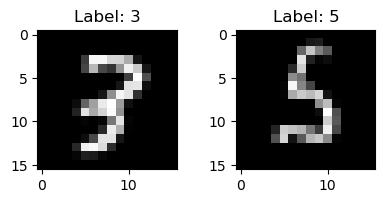

In [12]:
# show one image from each class (in the train- and testsets, the images are randomly permuted)
x_vis = [
    (x_train_small[y_train==digits[0]])[random.choice(range(200))],
    (x_train_small[y_train==digits[1]])[random.choice(range(200))]
]
y_vis = [0, 1]

# later when we train the model we include the predictions as well, so let's just add the functionality here
def visualize_data(x, y, pred=None):
    n_img = len(x)
    labels_list = digits
    fig, axes = plt.subplots(1, len(x), figsize=(2*len(x), 2))
    for i in range(n_img):
        axes[i].imshow(x[i], cmap="gray")
        if pred is None:
            axes[i].set_title("Label: {}".format(labels_list[y[i]]))
        else:
            axes[i].set_title("Label: {}, Pred: {}".format(labels_list[y[i]], labels_list[pred[i]]))
    plt.tight_layout(w_pad=2)
    # plt.show()


visualize_data(x_vis, y_vis)

Using `tf.keras.datasets.mnist` uses a lot of GPU memory, can't get around this.

In [ ]:
#### Hyperparameters ####
input_dim = 256 # 16 X 16 pixels
num_classes = 4
num_layers = 32
num_qubits = 8
num_reup = 3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class QML_classifier(torch.nn.Module):
    """
    Class for creating a quantum machine learning (classification) model based on the StronglyEntanglingLayers template.

    Args:
        input_dim: the dimension of the input samples
        output_dim: the dimension of the output, i.e. the numbers of classes
        num_qubits: the number of qubits in the circuit
        num_layers: the number of layers within the StronglyEntanglingLayers template
    """
    def __init__(self, input_dim, output_dim, num_qubits, num_layers):
        super().__init__()
        torch.manual_seed(1337)  # fixed seed for reproducibility
        self.num_qubits = num_qubits
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.device = qml.device("lightning.qubit", wires=self.num_qubits)
        self.weights_shape = qml.StronglyEntanglingLayers.shape(
            n_layers=self.num_layers, n_wires=self.num_qubits
        )

        @qml.qnode(self.device)
        def circuit(inputs, weights, bias):
            inputs = torch.reshape(inputs, self.weights_shape)
            qml.StronglyEntanglingLayers(
                weights=weights * inputs + bias, wires=range(self.num_qubits)
            )
            return [qml.expval(qml.PauliZ(i)) for i in range(self.output_dim)]

        param_shapes = {"weights": self.weights_shape, "bias": self.weights_shape}
        init_vals = {
            "weights": 0.1 * torch.rand(self.weights_shape),
            "bias": 0.1 * torch.rand(self.weights_shape),
        }

        # initialize the quantum circuit
        self.qcircuit = qml.qnn.TorchLayer(
            qnode=circuit, weight_shapes=param_shapes, init_method=init_vals
        )

    def forward(self, x):
        inputs_stack = torch.hstack([x] * num_reup)
        return self.qcircuit(inputs_stack)

## MNISQ

Label: 4


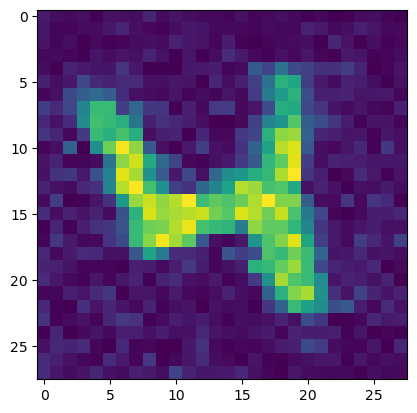

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml

[ds] = qml.data.load("other", name="mnisq")

@qml.qnode(qml.device("default.qubit"))
def circuit(num):
    for op in ds.circuits[num]:
        qml.apply(op)

    return qml.state()

num = 20
image_array = np.reshape(np.abs(circuit(num)[:784]), [28,28])
label = ds.labels[num]
print(f'Label: {label}')
#show the encoded image
plt.imshow(image_array)
plt.show()

In [70]:
X_train = np.tensor([np.reshape(np.abs(circuit(num)[:784]), [28,28]) for num in range(10)])

AttributeError: module 'numpy' has no attribute 'tensor'

In [71]:
print(f'Shape : {X_train.shape}')
print(f'dType : {X_train.dtype}')
print(f'pyType: {type(X_train)}')

Shape : (10, 28, 28)
dType : float64
pyType: <class 'pennylane.numpy.tensor.tensor'>


In [56]:
from pennylane import numpy as np